In [17]:
import numpy
import pandas as pd
import seaborn as sns
from numpy import arange
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [3]:
brawlhalla_data = pd.read_csv("brawlhalla.csv")
print(brawlhalla_data.shape)

(55, 8)


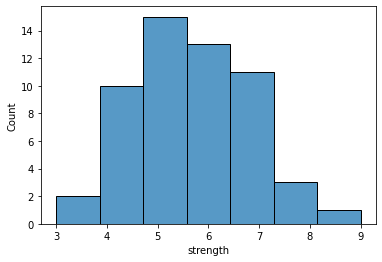

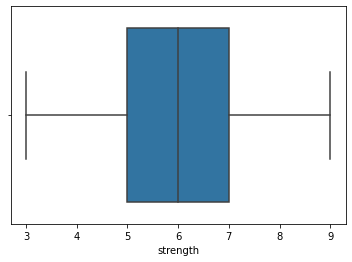

In [14]:
#Histogram and boxplot of strength
sns.histplot(data = brawlhalla_data, x = "strength")
plt.show()

sns.boxplot(data = brawlhalla_data, x = "strength")
plt.show()

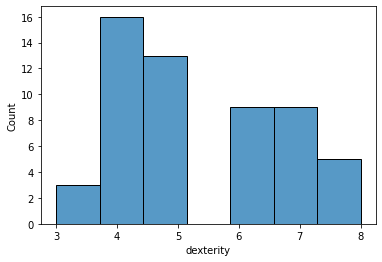

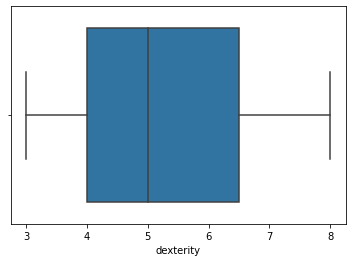

In [6]:
#Histogram and boxplot of dexterity

sns.histplot(data = brawlhalla_data, x = "dexterity")
plt.show()

sns.boxplot(data = brawlhalla_data, x = "dexterity")
plt.show()


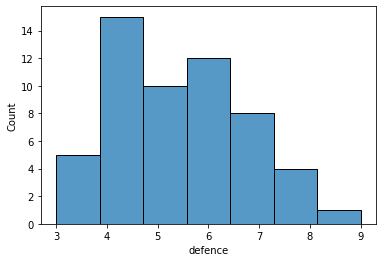

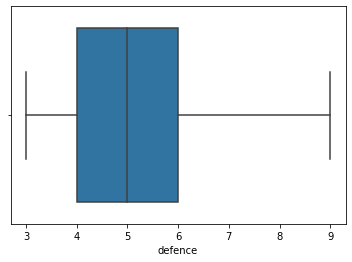

In [15]:
#Histogram and boxplot of defence
sns.histplot(data = brawlhalla_data, x = "defence")
plt.show()

sns.boxplot(data = brawlhalla_data, x = "defence")
plt.show()

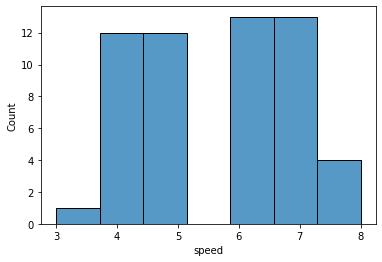

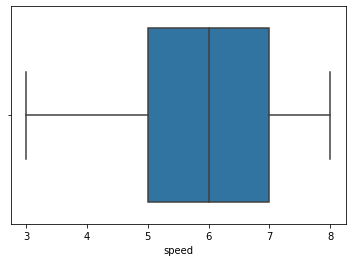

In [16]:
#Histogram and boxplot of speed

sns.histplot(data = brawlhalla_data, x = "speed")
plt.show()

sns.boxplot(data = brawlhalla_data, x = "speed")
plt.show()



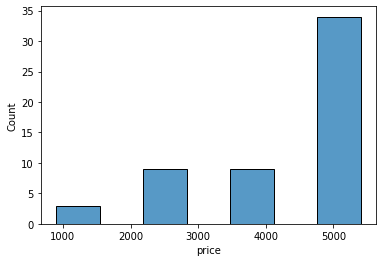

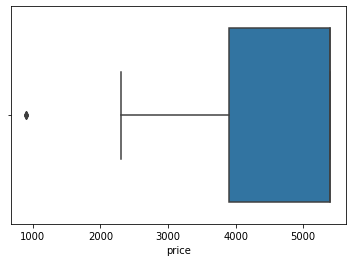

In [9]:
#Histogram and boxplot of price

sns.histplot(data = brawlhalla_data, x = "price")
plt.show()

sns.boxplot(data = brawlhalla_data, x = "price")
plt.show()


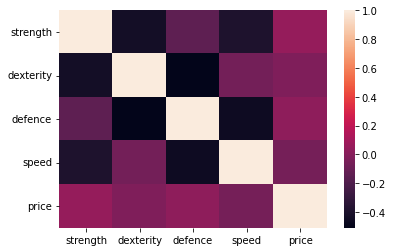

In [5]:
#Heatmap of features.

sns.heatmap(brawlhalla_data.corr())
plt.show()

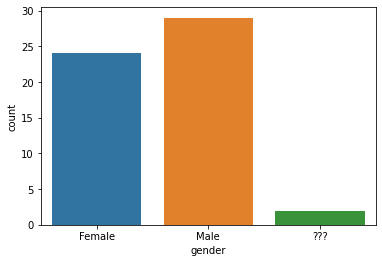

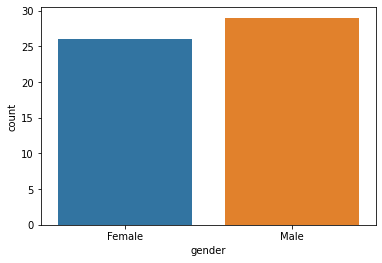

In [11]:
#Cleaning the data to remove question marks.

sns.countplot(x = "gender", data = brawlhalla_data)
plt.show()

brawlhalla_data["gender"].replace("???", "Female", inplace=True)

sns.countplot(x = "gender", data = brawlhalla_data)
plt.show()



In [12]:
#Dropping the name and date released features as they won't help the model.

dummies = pd.get_dummies(brawlhalla_data, columns = ["gender"])



brawlhalla_data = brawlhalla_data.drop(["name", "datereleased"], axis=1)


cleaned_data = pd.get_dummies(brawlhalla_data, columns = ["gender"])


In [13]:
X = cleaned_data.drop(["price"], axis =1)
Y = cleaned_data["price"]
validation_size = .20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'


# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = f"{name}, {cv_results.mean()}, {cv_results.std()}"
  print(msg)
  




LR, -2441203.4112953045, 1377709.587753082
LASSO, -2534889.8853472234, 1367794.9937041227
EN, -2407193.712281717, 1297399.2180568536
KNN, -2960054.0, 1605381.898317033
CART, -4705950.0, 1843465.2078355046
SVR, -3057264.119684097, 2319787.8560692985
